In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

import keras

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

from keras.applications.vgg19 import preprocess_input, decode_predictions


In [3]:
train_datagen = ImageDataGenerator( zoom_range=0.5, shear_range=0.3 ,horizontal_flip=True, preprocessing_function= preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

train = train_datagen.flow_from_directory(directory="E:\\My Projects\\Medicinal_plant_detection\\data", target_size=(256,256), batch_size=32)

val = val_datagen.flow_from_directory(directory="E:\\My Projects\\Medicinal_plant_detection\\test", target_size=(256,256), batch_size=32)

Found 1835 images belonging to 30 classes.
Found 433 images belonging to 30 classes.


In [4]:
img, lb = train.next()


In [5]:
img.shape

(32, 256, 256, 3)

In [6]:
lb.shape

(32, 30)

In [7]:
def plotImg(img, lb):
    for im, l in zip(img, lb):
        plt.figure(figsize=(5, 5))
        plt.imshow(im/255)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


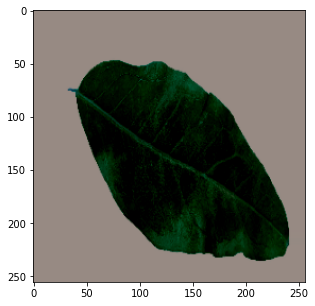

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


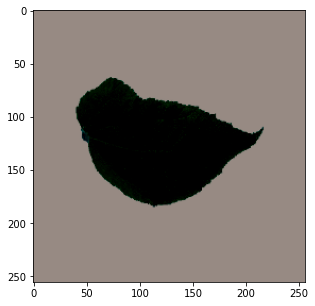

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


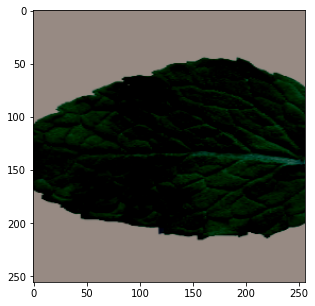

In [8]:
plotImg(img[:3], lb[:3])

## **Model Building**

In [9]:
import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [10]:
model = VGG19(input_shape=(256,256, 3), include_top=False)

In [11]:
for layer in model.layers:
    layer.trainable =False

In [12]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [13]:
X =Flatten()(model.output)
X = Dense(units= 30, activation='softmax')(X)

mymodel = Model(model.input, X)

mymodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

                                                                 
 block5_conv4 (Conv2D)       (None, 16, 16, 512)       2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 8, 8, 512)         0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 30)                983070    
                                                                 
Total params: 21,007,454
Trainable params: 983,070
Non-trainable params: 20,024,384
_________________________________________________________________


In [14]:
mymodel.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

## **Model Training**

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='accuracy', min_delta=0.01, patience=3, verbose= 1)

mc = ModelCheckpoint(filepath="myModel.h5", monitor="accuracy", min_delta= 0.01, patience=3, verbose= 1, save_best_only= True)

cb = [es, mc]


In [16]:
his = mymodel.fit_generator(train, steps_per_epoch=16, epochs=10, verbose=1, callbacks=cb, validation_data= val, validation_steps=16)

C:\Users\User\AppData\Local\Temp\ipykernel_6300\1798767416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = mymodel.fit_generator(train, steps_per_epoch=16, epochs=10, verbose=1, callbacks=cb, validation_data= val, validation_steps=16)


Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 14.6182 - accuracy: 0.2852WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: accuracy improved from -inf to 0.28516, saving model to myModel.h5
16/16 [==============================] - 23s 837ms/step - loss: 14.6182 - accuracy: 0.2852 - val_loss: 4.0624 - val_accuracy: 0.6674
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 5.8975 - accuracy: 0.6354
Epoch 2: accuracy improved from 0.28516 to 0.63544, saving model to myModel.h5
16/16 [==============================] - 8s 499ms/step - loss: 5.8975 - accuracy: 0.6354
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 3.9858 - accuracy: 0.7312
Epoch 3: accuracy improved from 0.63544 to 0.73116, saving model to myMode

## **Model Testing**

In [17]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss(red) and Accuracy')

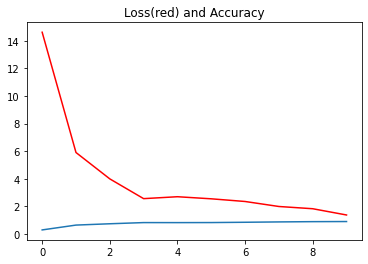

In [18]:
plt.plot(h['accuracy'])
plt.plot(h['loss'], c= 'red')
plt.title("Loss(red) and Accuracy")

In [19]:
acc = mymodel.evaluate_generator(train)[1]
print(f'accuracy: {acc*100} %')


C:\Users\User\AppData\Local\Temp\ipykernel_6300\122934384.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = mymodel.evaluate_generator(train)[1]


accuracy: 89.53678607940674 %


In [20]:
ref = dict(zip(train.class_indices.values(), list(train.class_indices.keys())))

## **Prediction** 

In [21]:
import tensorflow as tf
def predict(path):
    img = tf.keras.utils.load_img(path, target_size=(256,256))
    i = tf.keras.utils.img_to_array(img)

    ims = preprocess_input(i)

    imgs = np.expand_dims(ims, axis=0)

    pred = np.argmax(mymodel.predict(imgs))

    print(f'Predicted Class is: {ref[pred]}')

In [23]:
train.class_indices

{'Alpinia Galanga (Rasna)': 0,
 'Amaranthus Viridis (Arive-Dantu)': 1,
 'Artocarpus Heterophyllus (Jackfruit)': 2,
 'Azadirachta Indica (Neem)': 3,
 'Basella Alba (Basale)': 4,
 'Brassica Juncea (Indian Mustard)': 5,
 'Carissa Carandas (Karanda)': 6,
 'Citrus Limon (Lemon)': 7,
 'Ficus Auriculata (Roxburgh fig)': 8,
 'Ficus Religiosa (Peepal Tree)': 9,
 'Hibiscus Rosa-sinensis': 10,
 'Jasminum (Jasmine)': 11,
 'Mangifera Indica (Mango)': 12,
 'Mentha (Mint)': 13,
 'Moringa Oleifera (Drumstick)': 14,
 'Muntingia Calabura (Jamaica Cherry-Gasagase)': 15,
 'Murraya Koenigii (Curry)': 16,
 'Nerium Oleander (Oleander)': 17,
 'Nyctanthes Arbor-tristis (Parijata)': 18,
 'Ocimum Tenuiflorum (Tulsi)': 19,
 'Piper Betle (Betel)': 20,
 'Plectranthus Amboinicus (Mexican Mint)': 21,
 'Pongamia Pinnata (Indian Beech)': 22,
 'Psidium Guajava (Guava)': 23,
 'Punica Granatum (Pomegranate)': 24,
 'Santalum Album (Sandalwood)': 25,
 'Syzygium Cumini (Jamun)': 26,
 'Syzygium Jambos (Rose Apple)': 27,
 'Tab

In [22]:
# predict("E:\My Projects\Plant Detection\data\Syzygium Jambos (Rose Apple)\SJ-S-003.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\My Projects\\Plant Detection\\data\\Syzygium Jambos (Rose Apple)\\SJ-S-003.jpg'

## **Save Model**

In [ ]:
# mymodel.save('VGG19_test_model.h5')